# Wine Quality

In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos de iris
data = load_iris()
X = data.data
y = data.target

# Crear un DataFrame con las características
df = pd.DataFrame(X, columns=data.feature_names)

# Añadir la columna de etiquetas (target)
df['target'] = y


In [19]:
# Tamaño y forma del dataframe
df.shape  # Muestra la cantidad de filas y columnas en el dataframe.

(150, 5)

In [20]:
# Primeras filas del dataframe
df.head()  # Muestra las primeras 5 filas del dataframe para dar un vistazo inicial a los datos.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
# Ultimas filas del dataframe
df.tail()  # Muestra las últimas 5 filas, útil para ver si los datos tienen algún patrón final.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [22]:
# Información general del dataframe
df.info()  # Muestra el tipo de datos, el número de valores no nulos y el uso de memoria de cada columna.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [23]:
# Estadísticas descriptivas de las columnas numéricas
df.describe()  # Calcula estadísticas básicas como media, desviación estándar, mínimo, máximo, y percentiles para las columnas numéricas.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [24]:
# Comprobación de valores nulos
df.isnull().sum()  # Cuenta la cantidad de valores nulos en cada columna.

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [25]:
# Inspección de nombres de columnas
df.columns  # Lista los nombres de las columnas, útil para verificar si hay espacios, caracteres especiales o errores tipográficos.

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [26]:
# Identificación de valores duplicados
df.duplicated().sum()  # Muestra la cantidad de filas duplicadas en el dataframe.

np.int64(1)

In [27]:
df = df.drop_duplicates()

In [28]:
# Distribución de tipos de datos
df.dtypes.value_counts()  # Muestra la cantidad de columnas de cada tipo de dato (int, float, object, etc.).

float64    4
int64      1
Name: count, dtype: int64

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

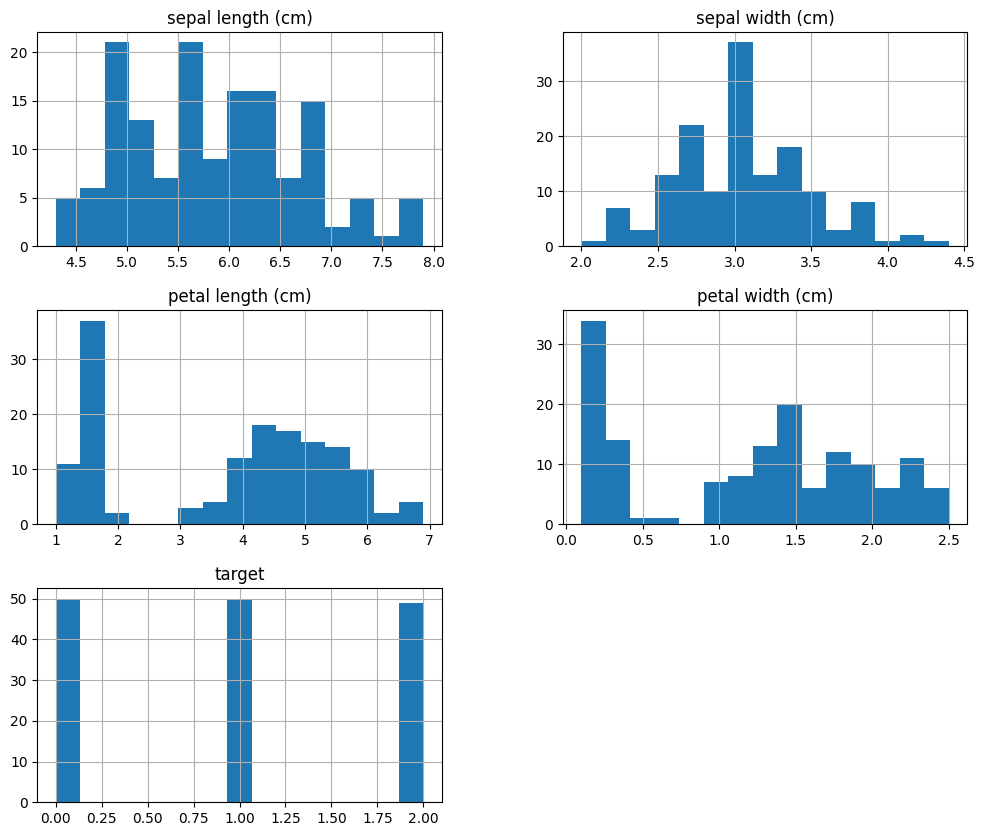

In [29]:
# Visualización de distribuciones numéricas
df.hist(figsize=(12, 10), bins=15)  # Crea histogramas para todas las columnas numéricas.

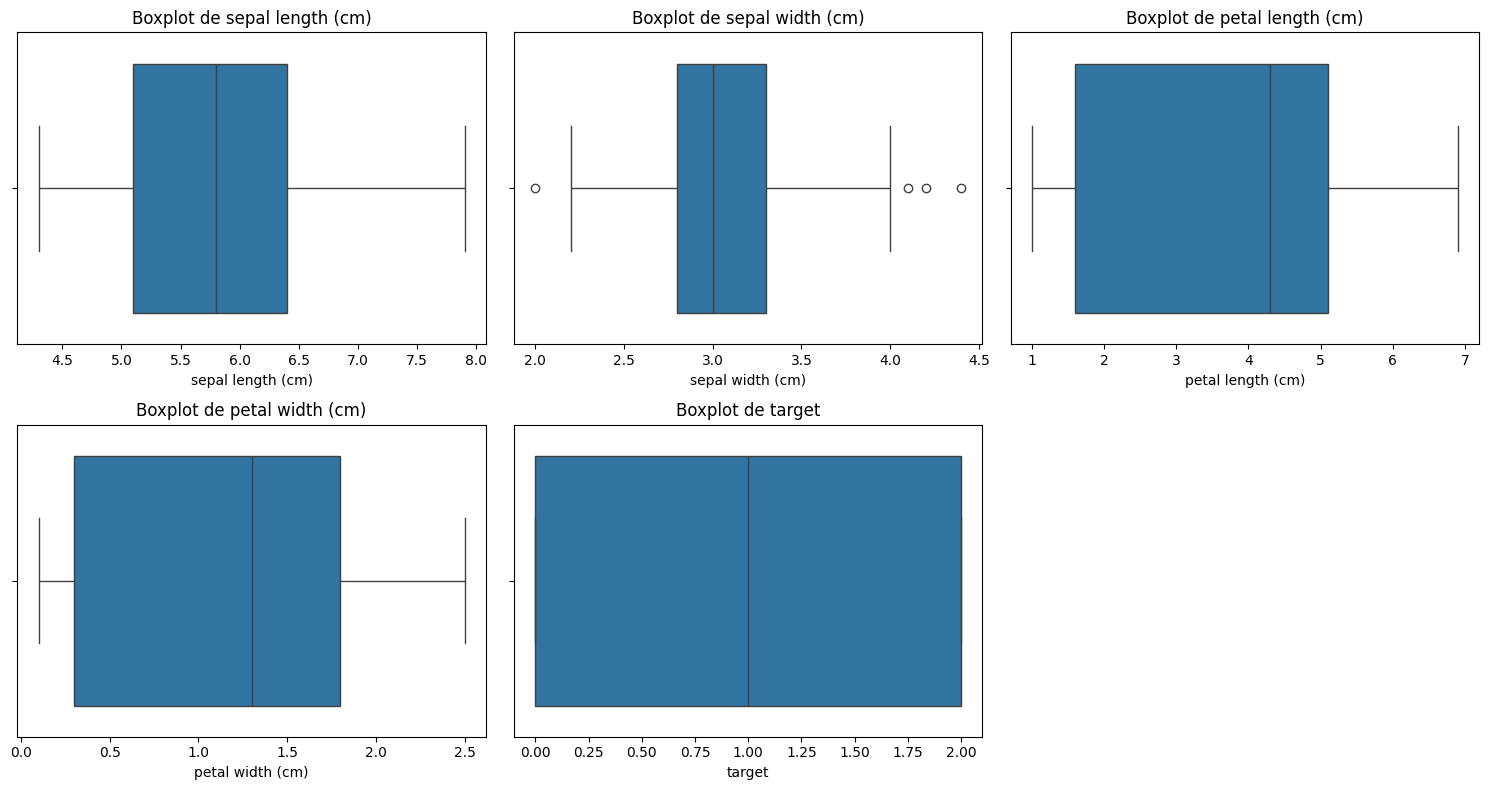

In [30]:
# Boxplots para detectar outliers en columnas numéricas

# Selecciona las columnas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Define el tamaño de la figura y el layout de los subplots
n_cols = 3  # Número de columnas de subplots en cada fila
n_rows = int(np.ceil(len(numeric_columns) / n_cols))  # Calcula el número de filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Ajusta el tamaño de la figura

# Genera un boxplot en cada subplot
for i, column in enumerate(numeric_columns):
    row = i // n_cols  # Fila del subplot
    col = i % n_cols   # Columna del subplot
    sns.boxplot(data=df, x=column, ax=axes[row, col])
    axes[row, col].set_title(f"Boxplot de {column}")

# Oculta cualquier subplot vacío si hay menos columnas que el número de subplots disponibles
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [34]:
# Detectar valores atípicos (outliers) con el rango intercuartil (IQR)
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Un valor se considera atípico si está por debajo de (Q1 - 1.5 * IQR) o por encima de (Q3 + 1.5 * IQR).
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    print(f"\n{column} - Número de outliers: {outliers.shape[0]}")



sepal length (cm) - Número de outliers: 0

sepal width (cm) - Número de outliers: 4

petal length (cm) - Número de outliers: 0

petal width (cm) - Número de outliers: 0

target - Número de outliers: 0


In [35]:
def eliminar_outliers_columna(df, columna):
    # Copiar el dataframe original para mantener el original sin cambios
    df_sin_outliers = df.copy()
    
    # Verificar si la columna está en el dataframe y si es numérica
    if columna in df_sin_outliers.select_dtypes(include=['float64', 'int64']).columns:
        # Calcular el primer y tercer cuartil, y el rango intercuartil (IQR)
        Q1 = df_sin_outliers[columna].quantile(0.25)
        Q3 = df_sin_outliers[columna].quantile(0.75)
        IQR = Q3 - Q1

        # Definir los límites inferior y superior para los outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtrar el dataframe excluyendo los outliers para la columna indicada
        df_sin_outliers = df_sin_outliers[(df_sin_outliers[columna] >= lower_bound) & 
                                          (df_sin_outliers[columna] <= upper_bound)]
    else:
        print(f"La columna '{columna}' no existe o no es numérica.")
    
    return df_sin_outliers


# Ejecutar la función para obtener el dataframe sin outliers en una columna específica
columna_objetivo = 'target'  # Especifica la columna deseada
df_sin_outliers = eliminar_outliers_columna(df, columna_objetivo)


# Verificar la cantidad de filas antes y después de la limpieza
print(f"Dataframe original: {df.shape}")
print(f"Dataframe sin outliers en '{columna_objetivo}': {df_sin_outliers.shape}")


Dataframe original: (149, 5)
Dataframe sin outliers en 'target': (149, 5)


In [36]:
df = df_sin_outliers

<Axes: >

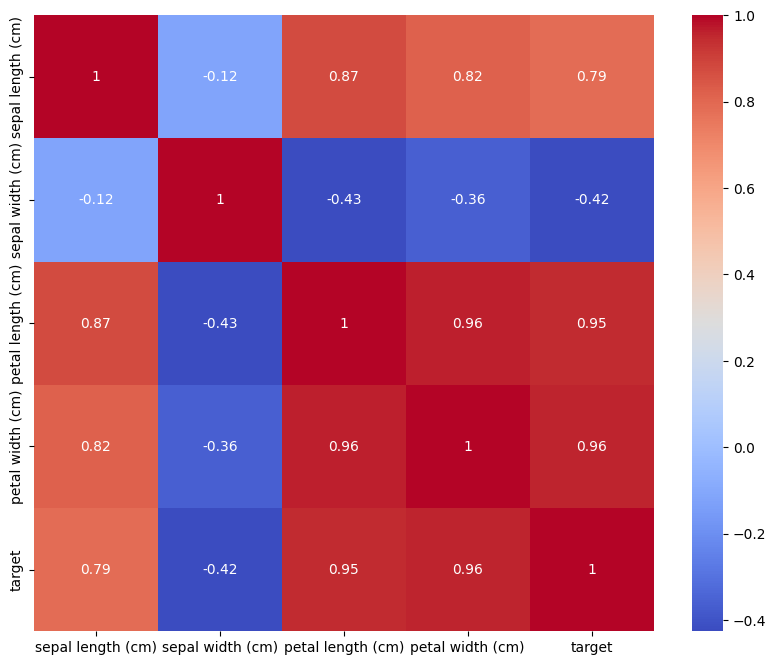

In [37]:
# Seleccionar solo las columnas numéricas para el análisis de correlación
numeric_cols = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación solo para las columnas numéricas
correlation_matrix = numeric_cols.corr()

# Gráfico de matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")  # Visualiza la matriz de correlación en un heatmap.

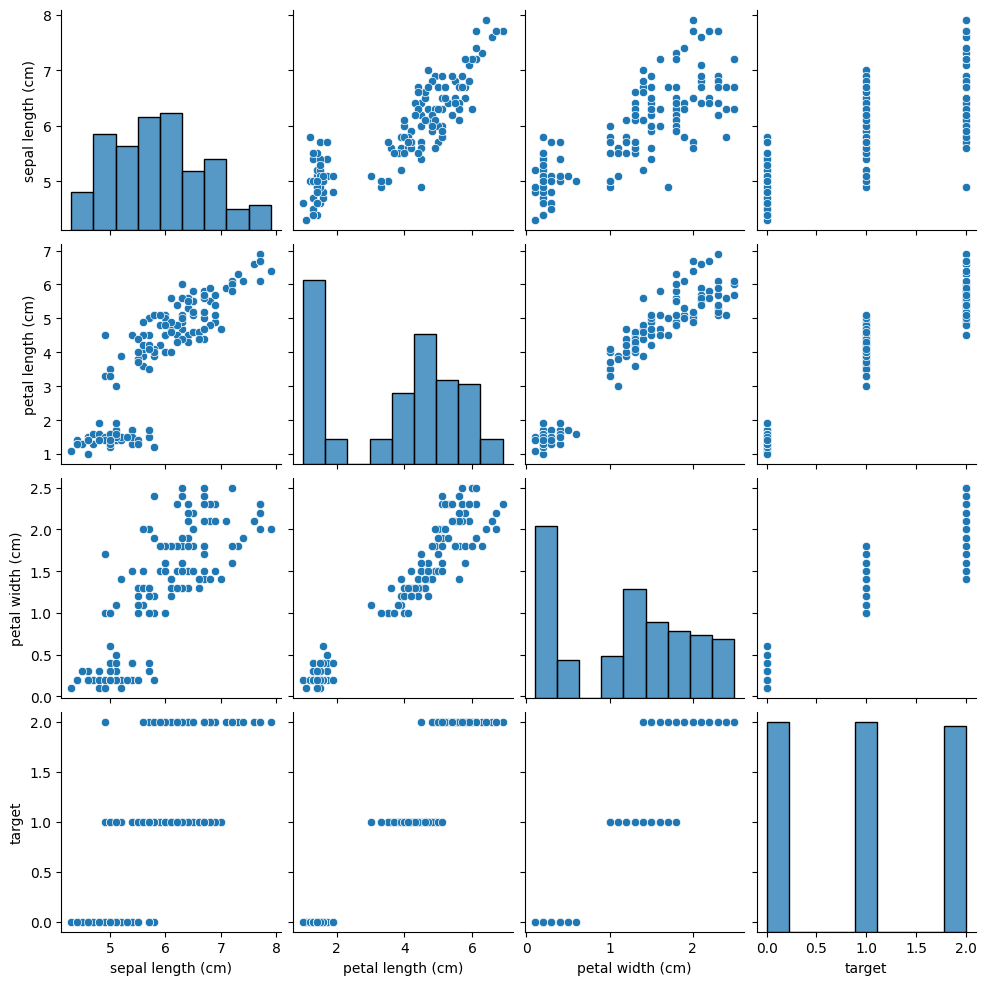

In [38]:
# Distribución por pares de variables (usando un pairplot)

# Paso 1: Filtra las variables que tienen una correlación alta (por ejemplo, superior a 0.6 en valor absoluto) Se debe ajustar segun necesidad
threshold = 0.6
high_corr_pairs = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1)]

# Paso 2: Selecciona solo las columnas con alta correlación
correlated_vars = high_corr_pairs.dropna(how='all', axis=1).columns

# Paso 3: Genera el pairplot solo para las variables con correlación significativa
sns.pairplot(df[correlated_vars]) # Muestra gráficos de dispersión y distribuciones univariadas para todas las variables numéricas

In [39]:
# Filtrar las características más importantes para el modelo:

# Definir la variable objetivo (por ejemplo, 'price')
target_variable = 'target'  # Cambia por el nombre de tu variable objetivo

# Calcular la correlación de todas las columnas con la variable objetivo
correlation_matrix = df.corr()[target_variable]

# Filtrar las columnas que tienen una correlación mayor o igual a 0.40 con la variable objetivo
selected_features = correlation_matrix[correlation_matrix.abs() >= 0.10].index

# Crear un nuevo DataFrame solo con las columnas seleccionadas
df_selected = df[selected_features]

print("Columnas seleccionadas:")
print(selected_features)
print("\nDataFrame con columnas seleccionadas:")
print(df_selected.head())

Columnas seleccionadas:
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

DataFrame con columnas seleccionadas:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

X = df.drop(["target"], axis=1) # Features
y = df["target"] # Target

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de Random Forest sin PCA
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión sin PCA: {accuracy:.4f}")

# Aplicar PCA y entrenar el modelo de Random Forest nuevamente
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

clf_pca = RandomForestClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Precisión con PCA: {accuracy_pca:.4f}")

Precisión sin PCA: 1.0000
Precisión con PCA: 0.9667
